In [284]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
#textblob to apply sentiment analysis 
from textblob import TextBlob
import random
import seaborn as sns
sns.set()

In [304]:
#read the csv file containing musks tweets
tweets = pd.read_csv('../using_twint/tesla_tweets.csv')
#.head(100).astype('datetime64[ns]')
tweets["date"]=tweets["date"].astype('datetime64[ns]')
print(tweets.iloc[1]['date'])


2015-12-31 00:00:00


In [286]:
#get a particular tweet text
some_tweet = tweets.iloc[random.randint(1, 100)]['tweet']
print(some_tweet)
#get the 'sentiment' of a particular tweet 
analysis = TextBlob(some_tweet)
print(analysis.sentiment)

@Bi11K @TeslaMotors So many sweet teslas in my hood. Can't wait to see a model x on the road. Have not yet.  $tsla
Sentiment(polarity=0.425, subjectivity=0.575)


In [308]:
tweet_date = []
tweet_count = []#np.array(x)
count=0
from datetime import timedelta  

for index, row in tweets.iterrows():
    if index<7: continue
    #print(baracks_tweets[i]['date'].day)
    if tweets.iloc[index]['date']<(tweets.iloc[index-1]['date']+ timedelta(days=7)):
        count+=1    #else:
    else:
        count+=1
        tweet_count.append(count)
        count=0

In [311]:
tweets["date"].resample('5Day')
#plt.plot(tweets["date"],tweet_count)

ValueError: Invalid frequency: 5Day

In [233]:
sentiment_array = []
date_array = []

In [234]:
#store sentiments into dataframe
#I DONT KNOW HOW TO GET THIS TO WORK?? 

for index, row in tweets.iterrows():
    text = tweets.iloc[index]['tweet']
    analysis = TextBlob(text)
    row['Polarity'] = analysis.sentiment[0]
    row['Subjectivity'] = analysis.sentiment[1]
    sentiment_array.append(analysis.sentiment[0])
    date_array.append(tweets.iloc[index]['date'])



In [235]:
import quandl
%matplotlib inline
%pylab inline
quandl.ApiConfig.api_key = "cHs3hSC-ys83Msb8qXyh"#This is Jorge's key, get yourself a new one.

def datetime_from_utc_to_local(utc_datetime):
    now_timestamp = time.time()
    offset = datetime.datetime.fromtimestamp(now_timestamp) - datetime.datetime.utcfromtimestamp(now_timestamp)
    return utc_datetime + offset

Populating the interactive namespace from numpy and matplotlib


In [236]:
import matplotlib.cbook as cbook
import pylab
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
tweets['date'] = tweets['date'].astype('datetime64[ns]')
from pylab import *
pylab.rcParams['figure.figsize'] = (15, 9)

#ax.set_title('fig.autofmt_xdate fixes the labels')
#plt.plot(tweets["date"],sentiment_array)


In [237]:
print(date_array[len(date_array)-1], tweets["date"].tail(1))

2014-12-07 6001   2014-12-07
Name: date, dtype: datetime64[ns]


In [249]:
sentiment_array = np.array(sentiment_array)
y_filter = sentiment_array[sentiment_array<0]

In [262]:
start_date = datetime.datetime(2014,12,7) # Beginning of period 
end_date = datetime.datetime(2015,12,31)

stock = "TSLA" # some stock label we are interested in
data = quandl.get("WIKI/" + stock, start_date=start_date, end_date=end_date) #download data with quandl
data["7dclose"] = np.round(data["Close"].rolling(window = 4, center = False).mean(), 2)
data["7dopen"] = np.round(data["Open"].rolling(window = 4, center = False).mean(), 2)

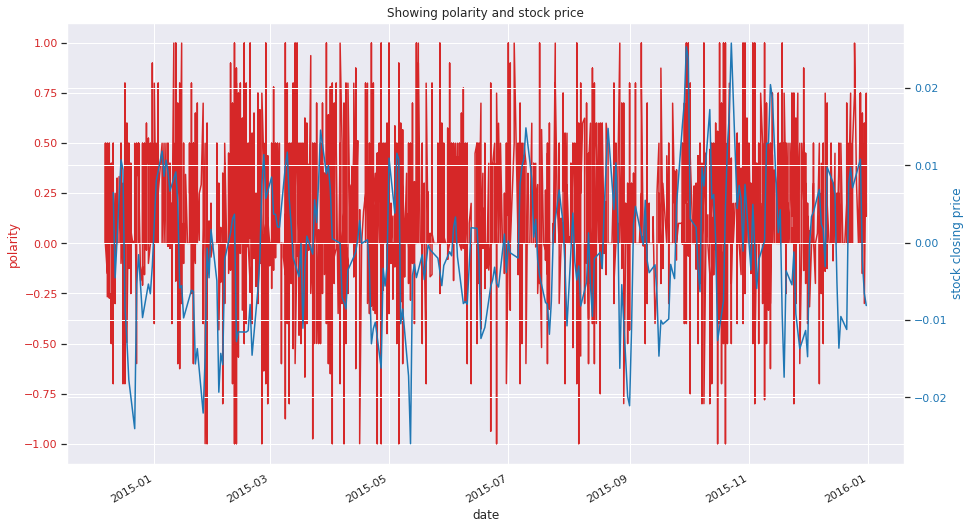

In [263]:
fig, ax1 = plt.subplots()
from ipykernel import kernelapp as app
fig.autofmt_xdate()

# use a more precise date string for the x axis locations in the
# toolbar
color = 'tab:red'
ax1.set_xlabel('date')
ax1.set_ylabel('polarity', color=color)
ax1.plot(tweets["date"],sentiment_array, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('stock closing price', color=color)  # we already handled the x-label with ax1
ax2.plot((data["7dopen"]-data["7dclose"])/data["7dopen"],label="Daily closing price", color=color)
ax2.tick_params(axis='y', labelcolor=color)
#ax2.set_xlim(start_date,end_date);
ax2.set_title("Showing polarity and stock price");

In [261]:
print(len(tweets["date"]),len(sentiment_array), len(date_array),len(data["7dopen"]))

6002 6002 6002 269
